## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 18
---------------------------------------

GOALS:

1. Practice Logistic Regression
2. Interpret Logistic Regression Results

----------------------------------------------------------


This homework has **1 Exercise** and **1 Challenge Exercise**

### Important Information

- Email: [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
- Office Hours: Duke 209 <a href="https://joannabieri.com/schedule.html"> Click Here for Joanna's Schedule</a>


### Announcements

**Come to Lab!** If you need help we are here to help!

### Day 18 Assignment - same drill.

1. Make sure you can **Fork** and **Clone** the Day18 repo from [Redlands-DATA101](https://github.com/Redlands-DATA101)
2. Open the file Day18-HW.ipynb and start doing the problems.
    * You can do these problems as you follow along with the lecture notes and video.
3. Get as far as you can before class.
4. Submit what you have so far **Commit** and **Push** to Git.
5. Take the daily check in quiz on **Canvas**.
7. Come to class with lots of questions!

In [401]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Machine Learning Packages
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn import metrics

### Data: A collection of Emails

- Emails for the first three months of 2012 for an email account
- Data from 3921 emails and 21 variables on them
- Outcome: whether the email is spam or not
- Predictors: number of characters, whether the email had "Re:" in the subject, time at which email was sent, number of times the word "inherit" shows up in the email, etc.


Data Information: https://www.openintro.org/data/index.php?data=email

This lab follows the Data Science in a Box units "Unit 4 - Deck 6: Logistic regression" by Mine Çetinkaya-Rundel. It has been updated for our class and translated to Python by Joanna Bieri.

In [403]:
file_name = 'data/email.csv'
DF = pd.read_csv(file_name)

In [404]:
show(DF)

In [405]:
DF.shape

(3921, 21)

In [406]:
DF.keys()

Index(['spam', 'to_multiple', 'from', 'cc', 'sent_email', 'time', 'image',
       'attach', 'dollar', 'winner', 'inherit', 'viagra', 'password',
       'num_char', 'line_breaks', 'format', 're_subj', 'exclaim_subj',
       'urgent_subj', 'exclaim_mess', 'number'],
      dtype='object')

In [407]:
DF.describe()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess
count,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000
mean,0.093599,0.158123,0.999235,0.404489,0.277990,0.048457,0.132874,1.467228,0.038001,0.002040,0.108136,10.706586,230.658505,0.695231,0.261413,0.080337,0.001785,6.584290
std,0.291307,0.364903,0.027654,2.666424,0.448066,0.450848,0.718518,5.022298,0.267899,0.127759,0.959931,14.645786,319.304959,0.460368,0.439460,0.271848,0.042220,51.479871
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.459000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.856000,119.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.084000,298.000000,1.000000,1.000000,0.000000,0.000000,4.000000
max,1.000000,1.000000,1.000000,68.000000,1.000000,20.000000,21.000000,64.000000,9.000000,8.000000,28.000000,190.087000,4022.000000,1.000000,1.000000,1.000000,1.000000,1236.000000


In [408]:
DF.dtypes

spam              int64
to_multiple       int64
from              int64
cc                int64
sent_email        int64
time             object
image             int64
attach            int64
dollar            int64
winner           object
inherit           int64
viagra            int64
password          int64
num_char        float64
line_breaks       int64
format            int64
re_subj           int64
exclaim_subj      int64
urgent_subj       int64
exclaim_mess      int64
number           object
dtype: object

**Exercise 1** Logistic Regression with ONE explanatory variable.

Choose another variable from the data set to use as your explanatory variable and create a Logistic Regression model to predict if an email is spam or not. You should do all of the following:

1. Say what variable you are using to predict spam messages (do some analysis, at minimum a value_counts()). Why do you think this is a good variable to use in predicting if an email is spam.
2. Create and fit a Logistic Regression model.
3. Show the results: intercept, coefficient, basic confusion matrix prediction.
4. What do you think the decision cutoff should be? Update the cutoff and redo the confusion matrix.
5. Explain your results in words. You should talk about False Negative and False positive rates and what they mean in terms of the variables you chose.


**Exercise 2 - challenge** Logistic Regression with MORE THAN ONE explanatory variable.

Try redoing the analysis, but this time add a few more explanatory variables. Again do some analysis of the variables you are chosing and state why they are a good choice. Then answer again questions 1-5.

#### 1. Say what variable you are using to predict spam messages (do some analysis, at minimum a value_counts()). Why do you think this is a good variable to use in predicting if an email is spam.

**I will be using the number of line breaks to predict whether the message is spam or not. I think this is a good varaible for predicting spam emails because I would think real emails would focus on the organization of paragraphs in an email, while spam may be a wall of text.**

In [412]:
DF['line_breaks'].value_counts()

line_breaks
17      91
16      73
18      62
13      45
15      41
        ..
386      1
449      1
807      1
1128     1
1292     1
Name: count, Length: 797, dtype: int64

In [413]:
DF[['line_breaks','spam']].groupby('spam').describe()

line_breaks                                                         
           count        mean         std  min   25%    50%    75%     max
spam                                                                     
0         3554.0  243.653067  318.257105  2.0  42.0  137.0  315.0  4022.0
1          367.0  104.820163  301.995685  1.0  14.0   22.0   65.5  3729.0

**There are more observations that are not spam than those than are. Spam emails have a smaller mean and max number of line breaks than non-spam emails. This suggests spam emails may tend to have fewer line breaks.**

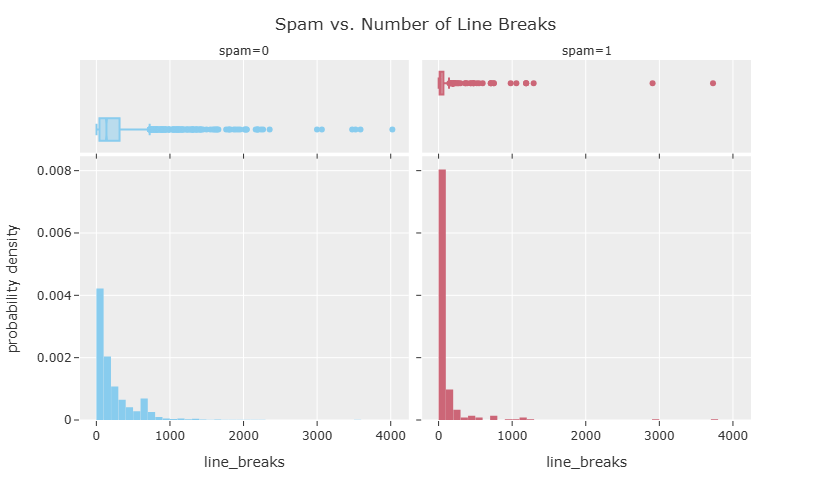

In [415]:
fig = px.histogram(DF,
                   x='line_breaks',
                   color='spam',
                   facet_col='spam',
                   nbins=50,
                   histnorm='probability density',
                   marginal="box",
                   color_discrete_sequence=px.colors.qualitative.Safe)


fig.update_layout(template="ggplot2",
                  bargap=0.02,
                  title='Spam vs. Number of Line Breaks',
                  title_x=0.5,
                  showlegend=False,
                  autosize=False,
                  width=800,
                  height=500)

fig.show()

**This graph suggests there may be a potential assocation between the number of line breaks and whether an email is spam. There is a greater percentage of spam emails with fewer line breaks compared to hte percentage of non-spam emails with fewer line breaks.**

#### 2. Create and fit a Logistic Regression model.

In [418]:
# Get a subset of the rows
DF_model = DF[['line_breaks','spam']]

# Get the variables
X = DF_model['line_breaks'].values.reshape(-1,1)
y = DF_model['spam']

# Do the regression
LM = LogisticRegression()
LM.fit(X,y)

LogisticRegression()

#### 3. Show the results: intercept, coefficient, basic confusion matrix prediction.

In [420]:
print('Classes:')
print(LM.classes_)
print('Coefficients:')
print(LM.coef_)
print('Intercept:')
print(LM.intercept_)

Classes:
[0 1]
Coefficients:
[[-0.00345463]]
Intercept:
[-1.73910342]


In [421]:
line_breaks = 0
intercept = -1.73910342
slope = -0.00345463

eta = intercept + slope*line_breaks

P = np.exp(eta)/(1+np.exp(eta))
print(P)

0.14942685266158895


**When there are 0 line breaks, the probability of the email being spam is around 14.94%.**

C:\Users\josee\AppData\Local\Temp\ipykernel_1204\2326637646.py:10: RuntimeWarning:

overflow encountered in exp

C:\Users\josee\AppData\Local\Temp\ipykernel_1204\2326637646.py:10: RuntimeWarning:

invalid value encountered in scalar divide



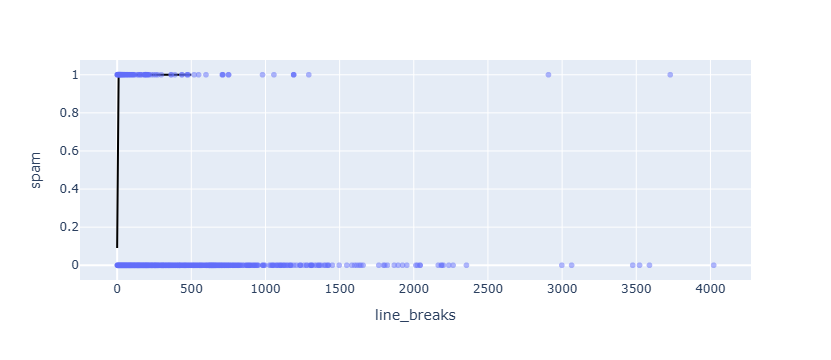

In [423]:
intercept = -2.30858816
slope = 1.41064075

P = []

line_breaks = list(np.arange(0,1300,10))

for num in line_breaks:
    eta = intercept + slope*num
    P.append(np.exp(eta)/(1+np.exp(eta)))


# Plot the results
fig = px.scatter(DF_model,x='line_breaks',y='spam',opacity=.5)

fig.add_trace(
    px.line(x=line_breaks,y=P,color_discrete_sequence=['black']).data[0]
)

fig.show()

**This graph of the probability shows that for greater number of line breaks, the probability of it being spam is greater. The graph is a bit confusing when the number of line breaks is 0, but I would interpret it as having equal probability of being spam or not spam.**

In [425]:
# import the metrics class
from sklearn import metrics

DF_model['prediction'] = LM.predict(X)

y_pred = DF_model['prediction'].values

cnf_matrix = metrics.confusion_matrix(y, y_pred)
cnf_matrix

array([[3554,    0],
       [ 367,    0]], dtype=int64)

**The confusion matrix tells us that 3554 observations were not spam and predicted to be not spam, 367 observations were not spam and predicted to be spam, 0 observations were spam and predicted to be not spam, and 0 observations were spam and predicted to be spam.**

#### 4. What do you think the decision cutoff should be? Update the cutoff and redo the confusion matrix.

In [428]:
# Create new columns in your data frame
DF_model[['prob not spam','prob spam']] = LM.predict_proba(X)
DF_model

,line_breaks,spam,prediction,prob not spam,prob spam
0,202,0,0,0.919601,0.080399
1,202,0,0,0.919601,0.080399
2,192,0,0,0.917010,0.082990
3,255,0,0,0.932140,0.067860
4,29,0,0,0.862864,0.137136
...,...,...,...,...,...
3916,12,1,0,0.855766,0.144234
3917,15,1,0,0.857040,0.142960
3918,208,0,0,0.921120,0.078880
3919,132,0,0,0.899810,0.100190


**I think the cutoff should be 14% probability of spam because it seems to produce a good balance of both sensitivity and specificity when calculated. It is not too picky about spam probability that there are no observations classified as spam, but not too lenient where it would too often classify non-spam emails as spam.**

In [430]:
cutoff = .14

# Use a lambda on the new columns to create your new prediction
DF_model['new_prediction'] = DF_model['prob spam'].apply(lambda x: 1 if x>cutoff else 0)

# Look at the model DF
DF_model

,line_breaks,spam,prediction,prob not spam,prob spam,new_prediction
0,202,0,0,0.919601,0.080399,0
1,202,0,0,0.919601,0.080399,0
2,192,0,0,0.917010,0.082990,0
3,255,0,0,0.932140,0.067860,0
4,29,0,0,0.862864,0.137136,0
...,...,...,...,...,...,...
3916,12,1,0,0.855766,0.144234,1
3917,15,1,0,0.857040,0.142960,1
3918,208,0,0,0.921120,0.078880,0
3919,132,0,0,0.899810,0.100190,0


In [431]:
# Redo the confusion matrix

y_pred = DF_model['new_prediction'].values

cnf_matrix = metrics.confusion_matrix(y, y_pred)
cnf_matrix

array([[3049,  505],
       [ 183,  184]], dtype=int64)

#### 5. Explain your results in words. You should talk about False Negative and False positive rates and what they mean in terms of the variables you chose.

In [433]:
TP = cnf_matrix[0,0]
FP = cnf_matrix[0,1]
FN = cnf_matrix[1,0]
TN = cnf_matrix[1,1]

print('False Negative Rate:')
print(FN/ (TP+FN))
print('------')
print('False Positive Rate:')
print(FP/ (FP+TN))
print('------')
print('Sensitivity:')
print(1 - (FN/ (TP+FN)))
print('------')
print('Specificity:')
print(1- (FP/ (FP+TN)))

False Negative Rate:
0.05662128712871287
------
False Positive Rate:
0.7329462989840348
------
Sensitivity:
0.9433787128712872
------
Specificity:
0.26705370101596515


**In 5.66% of cases where the email was not spam, it was labeled as spam. In 73.29% of cases where the email was spam, it was labeled as not spam. In cases where the email was not spam, it has a 94.34% probability of being labeled as not spam. In cases where the email was spam, it has a 26.71% probability of being labeled as spam.**

In [435]:
DF_model['new_prediction'].value_counts()

new_prediction
0    3232
1     689
Name: count, dtype: int64

**These probabilities reveal that using the number of line breaks to determine whether an email is spam or not is not very predictive, as there is a large probability of receiving a false positive (spam email labeled as not spam). However, this model was fairly accurate when predicting non-spam emails, although this may be attributed to the model tending to predict that an email is not spam.**